<a href="https://colab.research.google.com/github/nicolassalomon96/IA_Identificacion_y_Control/blob/main/TP_Programaci%C3%B3n_2/TP_Programaci%C3%B3n_2%20-%20Red_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Programación 2 - Punto 4

Aproximar una función f(x), x entre -2 y +2 mediante una serie de Fourier y mediante un Polinomio de un orden n basado en una Ley de Aprendizaje Supervisado.

## Importamos librerias necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures
from IPython.display import clear_output

## Creamos la Red Neuronal Multicapa y desarrollamos mediante una serie de Fourier

### Desarrollo para f(x) = 2*x + 0.8 * x^3

In [2]:
class MLP:
    def __init__(self, lr=0.1, loss_threshold=0.005, num_input=1, num_hidden=2, num_output=1):
        self.lr = lr
        self.loss_threshold = loss_threshold #Umbral máximo de error tolerable para detener el entrenamiento
        self.num_input = num_input
        self.num_hidden = num_hidden
        self.num_output = num_output
    
    def function(self, x):
      self.y_real = 2*x + 0.8*(x**3)
      return self.y_real
    
    #Generamos los pesos y bias inciales
    def load_weights(self):
      # - weights_01: pesos entre la capa de entrada y la oculta (en este caso sera el valor n para la serie de Fourier) - No debe actualizarse
      # - weights_12: pesos entre la capa oculta y de salida (en este caso sera el valor Cn para la serie de Fourier)
      self.weights_01 = np.arange(1,self.num_hidden+1,1)#np.random.uniform(size=(self.num_input, self.num_hidden))
      self.weights_12 = np.random.uniform(size=(self.num_hidden,self.num_output)) #np.random.uniform(size=(self.num_hidden,self.num_output))

      # - b01: bias para la capa oculta (en este caso sera el valor phin para la serie de Fourier)
      # - b12: bias para la capa de salida (en este caso sera el valor a0 para la serie de Fourier)
      self.b01 = np.random.uniform(size=(1,self.num_hidden))
      self.b12 = np.random.uniform(size=(1,self.num_output))

    #Función de activación empleada
    def sin(self, x):
        result = np.sin(x)
        return result

    #Derivada de la función de activación empleada
    def derivate_sin(self, x):
        result = np.cos(x)
        return result
    
    #Función generadora de puntos
    def get_point(self):
        self.point = np.random.uniform() * 4 - 2

    #Calculo de la salida de la neurona
    def forward(self, datapoint):
        self.o1 = datapoint * self.weights_01 + self.b01
        self.v1 = self.sin(self.o1)
        self.y = np.dot(self.v1, self.weights_12) + self.b12

        return self.y
    
    #Entrenamiento de la Neurona
    def train(self, iterations):
     
      self.losses = [] #Vector para ir guardando los errores
      error = 0
      self.load_weights()

      for i in range(iterations):
        print(f"Iteración: {i}")
        
        self.get_point()
        y = self.forward(self.point)

        error = ((self.function(self.point)) - y)[0][0]
        loss = 0.5 * ((error) ** 2)
        self.losses.append(loss)  
        
        #Actualizo los pesos y bias
        self.b01 += self.lr * error * self.derivate_sin(self.o1) * self.weights_12.T
        self.weights_12 += self.lr * error * self.v1.T
        self.b12 += self.lr * error

        clear_output(wait=True)
        if loss <= self.loss_threshold:
          print("Umbral de pérdida alcanzado")
          break
        
      print(f"Entrenamiento completado con {i+1} iteraciones")

#### Entrenamiento

In [48]:
coeficientes = 5
mlp = MLP(num_hidden=coeficientes, loss_threshold=1e-6, lr=0.01)
mlp.train(iterations=10000)

Umbral de pérdida alcanzado
Entrenamiento completado con 1346 iteraciones


#### Ploteo del error durante el entrenamiento

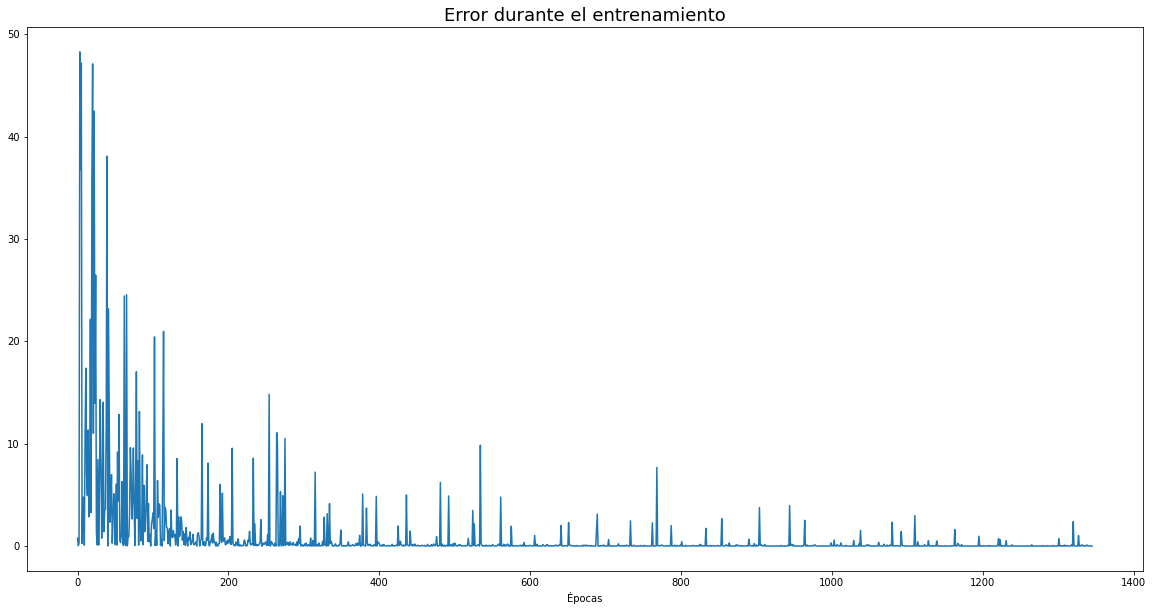

In [49]:
plt.figure(figsize=(20,10))
plt.plot(mlp.losses)
plt.title('Error durante el entrenamiento', fontsize=18)
plt.xlabel('Épocas')
plt.show()

In [52]:
print(f"cn = {mlp.weights_12}")
print(f"a0 = {mlp.b12}")
print(f"phin = {mlp.b01}")

cn = [[ 5.25447144]
 [-0.71085711]
 [-2.17322497]
 [ 2.09475023]
 [-0.91346795]]
a0 = [[-0.20309184]]
phin = [[ 0.06140236  0.25503353 -0.02587187  0.05195472  0.22718683]]


#### Test Final

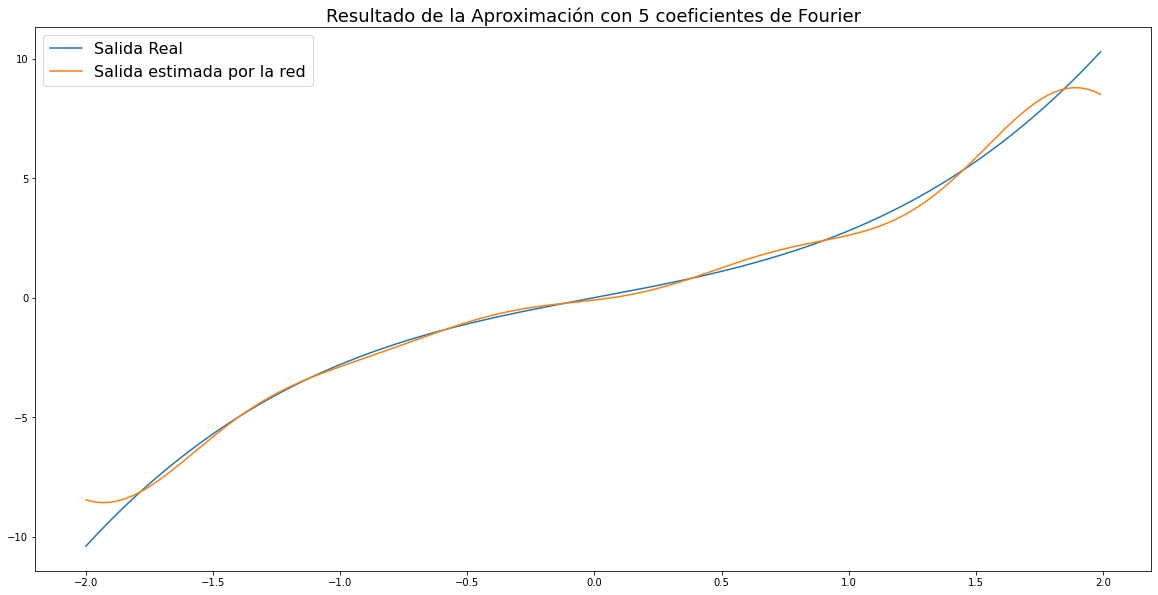

In [51]:
x = np.arange(-2,2,0.01)
y_real = 2*x + 0.8*(x**3)
y_est = []

#Coeficientes de Fourier
a0 = mlp.b12[0][0]
cn = mlp.weights_12.T[0]
phin = mlp.b01[0]
n = mlp.weights_01

for i in (x):
   y_est.append(a0 + np.sum(cn * np.sin(n*i + phin)))

plt.figure(figsize=(20,10))
plt.plot(x,y_real,label='Salida Real')
plt.plot(x,y_est,label='Salida estimada por la red')
plt.legend(fontsize=16)
plt.title(f'Resultado de la Aproximación con {coeficientes} coeficientes de Fourier', fontsize=18)
plt.show()

### Desarrollo para f(x) = x/(1+x^2) + 0.1*tanh(x)

In [53]:
class MLP:
    def __init__(self, lr=0.1, loss_threshold=0.005, num_input=1, num_hidden=2, num_output=1):
        self.lr = lr
        self.loss_threshold = loss_threshold #Umbral máximo de error tolerable para detener el entrenamiento
        self.num_input = num_input
        self.num_hidden = num_hidden
        self.num_output = num_output
    
    def function(self, x):
      self.y_real = x/(1+x**2) + 0.1*np.tanh(x)
      return self.y_real
    
    #Generamos los pesos y bias inciales
    def load_weights(self):
      # - weights_01: pesos entre la capa de entrada y la oculta (en este caso sera el valor n para la serie de Fourier) - No debe actualizarse
      # - weights_12: pesos entre la capa oculta y de salida (en este caso sera el valor Cn para la serie de Fourier)
      self.weights_01 = np.arange(1,self.num_hidden+1,1)#np.random.uniform(size=(self.num_input, self.num_hidden))
      self.weights_12 = np.random.uniform(size=(self.num_hidden,self.num_output)) #np.random.uniform(size=(self.num_hidden,self.num_output))

      # - b01: bias para la capa oculta (en este caso sera el valor phin para la serie de Fourier)
      # - b12: bias para la capa de salida (en este caso sera el valor a0 para la serie de Fourier)
      self.b01 = np.random.uniform(size=(1,self.num_hidden))
      self.b12 = np.random.uniform(size=(1,self.num_output))

    #Función de activación empleada
    def sin(self, x):
        result = np.sin(x)
        return result

    #Derivada de la función de activación empleada
    def derivate_sin(self, x):
        result = np.cos(x)
        return result
    
    #Función generadora de puntos
    def get_point(self):
        self.point = np.random.uniform() * 4 - 2

    #Calculo de la salida de la neurona
    def forward(self, datapoint):
        self.o1 = datapoint * self.weights_01 + self.b01
        self.v1 = self.sin(self.o1)
        self.y = np.dot(self.v1, self.weights_12) + self.b12

        return self.y
    
    #Entrenamiento de la Neurona
    def train(self, iterations):
     
      self.losses = [] #Vector para ir guardando los errores
      error = 0
      self.load_weights()

      for i in range(iterations):
        print(f"Iteración: {i}")
        
        self.get_point()
        y = self.forward(self.point)

        error = ((self.function(self.point)) - y)[0][0]
        loss = 0.5 * ((error) ** 2)
        self.losses.append(loss)  
        
        #Actualizo los pesos y bias
        self.b01 += self.lr * error * self.derivate_sin(self.o1) * self.weights_12.T
        self.weights_12 += self.lr * error * self.v1.T
        self.b12 += self.lr * error

        clear_output(wait=True)
        if loss <= self.loss_threshold:
          print("Umbral de pérdida alcanzado")
          break
        
      print(f"Entrenamiento completado con {i+1} iteraciones")

#### Entrenamiento

In [82]:
coeficientes = 5
mlp = MLP(num_hidden=coeficientes, loss_threshold=1e-9, lr = 0.1)
mlp.train(iterations=10000)

Umbral de pérdida alcanzado
Entrenamiento completado con 238 iteraciones


#### Ploteo del error durante el entrenamiento

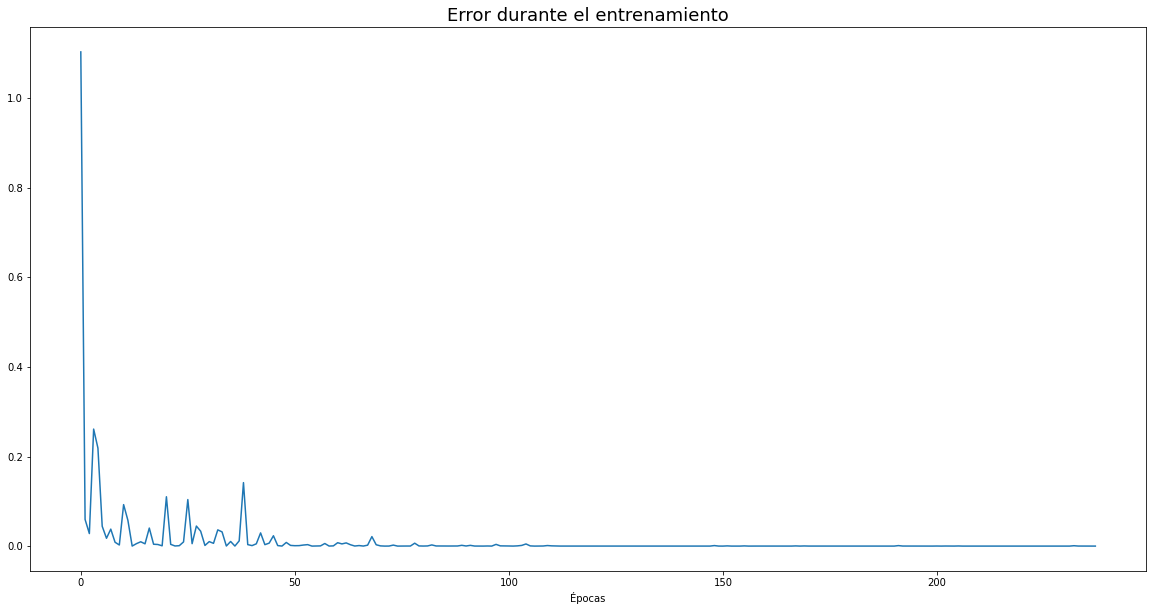

In [83]:
plt.figure(figsize=(20,10))
plt.plot(mlp.losses)
plt.title('Error durante el entrenamiento', fontsize=18)
plt.xlabel('Épocas')
plt.show()

#### Test final

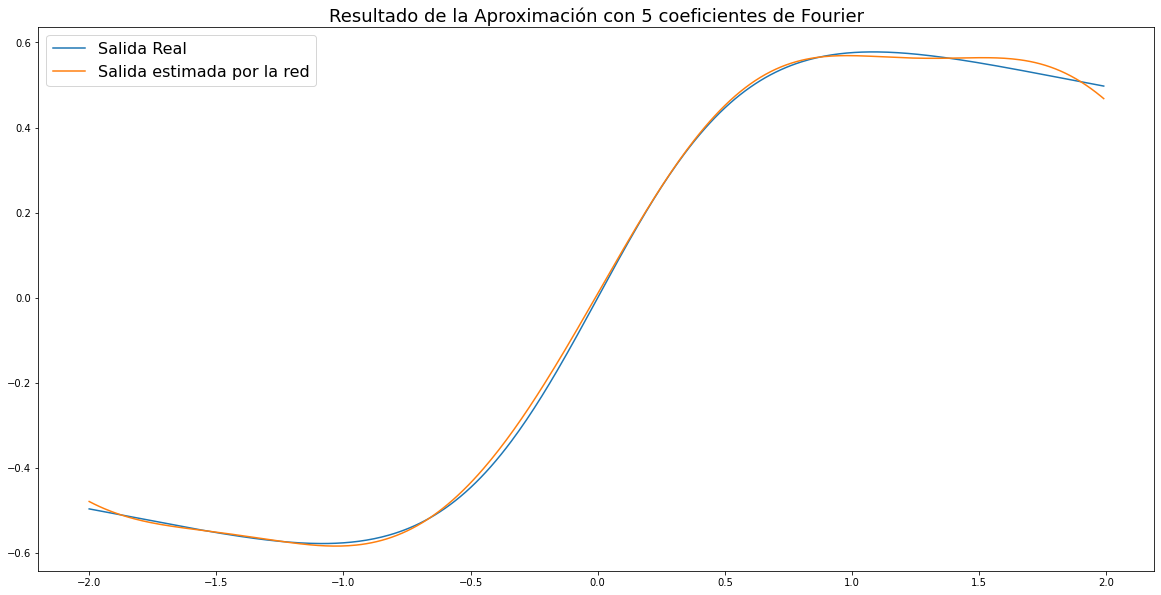

In [84]:
x = np.arange(-2,2,0.01)
y_real = x/(1+x**2) + 0.1*np.tanh(x)#2*x + 0.8*(x**3)
y_est = []

#Coeficientes de Fourier
a0 = mlp.b12[0][0]
cn = mlp.weights_12.T[0]
phin = mlp.b01[0]
n = mlp.weights_01

for i in (x):
   y_est.append(a0 + np.sum(cn * np.sin(n*i + phin)))

plt.figure(figsize=(20,10))
plt.plot(x,y_real,label='Salida Real')
plt.plot(x,y_est,label='Salida estimada por la red')
plt.legend(fontsize=16)
plt.title(f'Resultado de la Aproximación con {coeficientes} coeficientes de Fourier', fontsize=18)
plt.show()

In [85]:
print(f"cn = {mlp.weights_12}")
print(f"a0 = {mlp.b12}")
print(f"phin = {mlp.b01}")

cn = [[ 0.56635033]
 [ 0.14825699]
 [-0.00176923]
 [ 0.06332412]
 [-0.01600443]]
a0 = [[-0.00765099]]
phin = [[ 0.03143701 -0.02049693  0.7577387   0.21673593  0.65747743]]


## Creamos la Red Neuronal y desarrollamos mediante un Polinomio

### Desarrollo para f(x) = x/(1+x^2) + 0.1*tanh(x)

In [ ]:
def generate_data():
    X = np.arange(-2, 2, 0.001)
    y = X/(1+X**2) + 0.1*np.tanh(X)
    return X, y
trX, trY = generate_data()

In [ ]:
n = 5 #Cantidad de coeficientes
print(trX.shape)
trX_expanded = np.expand_dims(trX, axis=1)
print(trX_expanded.shape)
poly = PolynomialFeatures(n)
trX_expanded = poly.fit_transform(trX_expanded) # devuelve un vector de la forma: [1, x, x^2, x^3]

(4000,)
(4000, 1)


In [ ]:
inp = tf.keras.layers.Input((n+1)) #si quiero 5 coeficientes, la entrada sera igual a 6 dado que debo agregar el término independiente
out = tf.keras.layers.Dense(1)(inp)
model = tf.keras.models.Model(inputs=inp, outputs=out)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="mean_squared_error")

Epoch 1/200
125/125 [==============================] - 0s 1ms/step - loss: 12.7156
Epoch 2/200
125/125 [==============================] - 0s 1ms/step - loss: 6.2035
Epoch 3/200
125/125 [==============================] - 0s 1ms/step - loss: 3.5462
Epoch 4/200
125/125 [==============================] - 0s 1ms/step - loss: 2.4949
Epoch 5/200
125/125 [==============================] - 0s 1ms/step - loss: 2.0149
Epoch 6/200
125/125 [==============================] - 0s 1ms/step - loss: 1.7129
Epoch 7/200
125/125 [==============================] - 0s 1ms/step - loss: 1.4749
Epoch 8/200
125/125 [==============================] - 0s 1ms/step - loss: 1.2735
Epoch 9/200
125/125 [==============================] - 0s 1ms/step - loss: 1.1011
Epoch 10/200
125/125 [==============================] - 0s 1ms/step - loss: 0.9530
Epoch 11/200
125/125 [==============================] - 0s 1ms/step - loss: 0.8257
Epoch 12/200
125/125 [==============================] - 0s 1ms/step - loss: 0.7160
Epoch 13/200

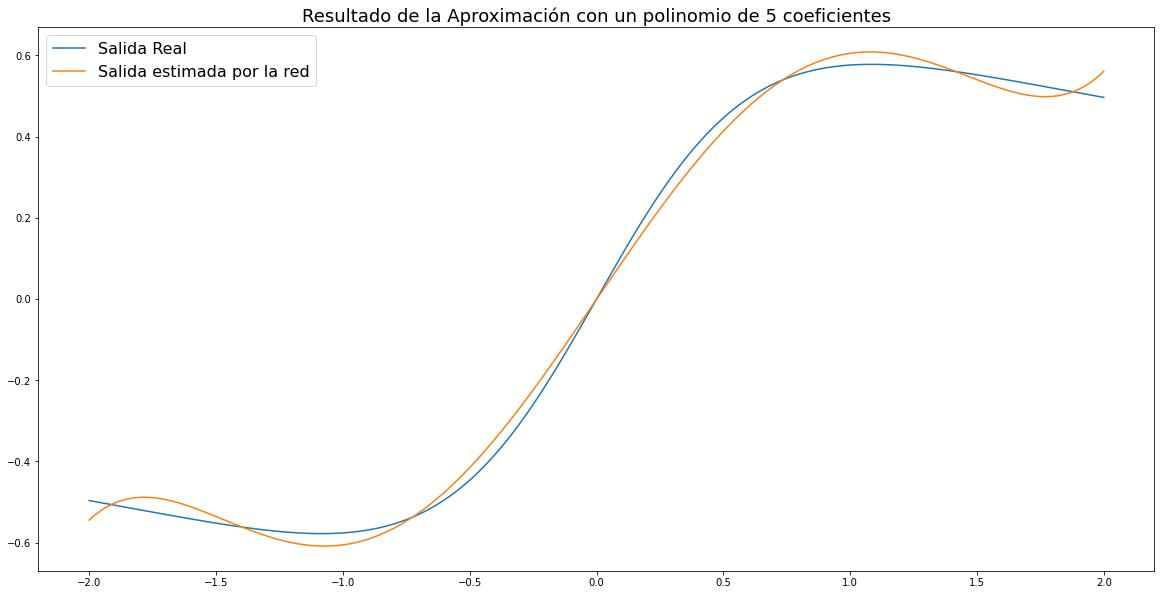

In [ ]:
model.fit(trX_expanded, trY, epochs=200)

plt.figure(figsize=(20,10))
plt.plot(trX,trY,label='Salida Real')
plt.plot(trX,model.predict(trX_expanded),label='Salida estimada por la red')
plt.legend(fontsize=16)
plt.title(f'Resultado de la Aproximación con un polinomio de {n} coeficientes', fontsize=18)
plt.show()

In [ ]:
weigths = model.get_weights()[0]
weigths

array([[ 1.1232210e-01],
       [ 9.1563761e-01],
       [-5.9719809e-05],
       [-3.6047634e-01],
       [ 5.9540535e-04],
       [ 5.0171006e-02]], dtype=float32)

### Desarrollo para f(x) = 2*x + 0.8 * x^3

In [ ]:
def generate_data():
    X = np.arange(-2, 2, 0.001)
    y = 2*X + 0.8*(X**3)
    return X, y
trX, trY = generate_data()

In [ ]:
n = 3 #Cantidfad de coeficientes
trX_expanded = np.expand_dims(trX, axis=1)
poly = PolynomialFeatures(n) 
trX_expanded = poly.fit_transform(trX_expanded) # devuelve un vector de la forma: [1, x, x^2, x^3]

In [ ]:
inp = tf.keras.layers.Input((n+1)) #si quiero 5 coeficientes, la entrada sera igual a 6 dado que debo agregar el término independiente
out = tf.keras.layers.Dense(1)(inp)
model = tf.keras.models.Model(inputs=inp, outputs=out)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="mean_squared_error")

Epoch 1/100
125/125 [==============================] - 0s 1ms/step - loss: 7.1368
Epoch 2/100
125/125 [==============================] - 0s 1ms/step - loss: 4.9130
Epoch 3/100
125/125 [==============================] - 0s 1ms/step - loss: 3.3486
Epoch 4/100
125/125 [==============================] - 0s 1ms/step - loss: 2.2773
Epoch 5/100
125/125 [==============================] - 0s 1ms/step - loss: 1.5693
Epoch 6/100
125/125 [==============================] - 0s 1ms/step - loss: 1.1225
Epoch 7/100
125/125 [==============================] - 0s 1ms/step - loss: 0.8550
Epoch 8/100
125/125 [==============================] - 0s 1ms/step - loss: 0.7011
Epoch 9/100
125/125 [==============================] - 0s 1ms/step - loss: 0.6150
Epoch 10/100
125/125 [==============================] - 0s 1ms/step - loss: 0.5655
Epoch 11/100
125/125 [==============================] - 0s 1ms/step - loss: 0.5337
Epoch 12/100
125/125 [==============================] - 0s 1ms/step - loss: 0.5098
Epoch 13/100


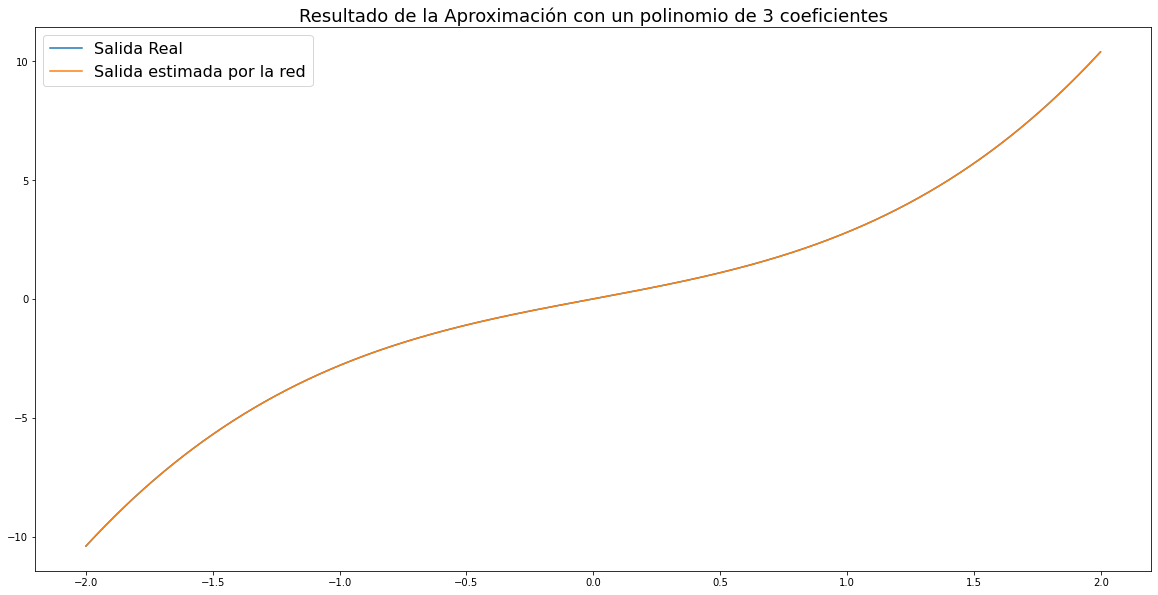

In [ ]:
model.fit(trX_expanded, trY, epochs=100)

plt.figure(figsize=(20,10))
plt.plot(trX,trY,label='Salida Real')
plt.plot(trX,model.predict(trX_expanded),label='Salida estimada por la red')
plt.legend(fontsize=16)
plt.title(f'Resultado de la Aproximación con un polinomio de {n} coeficientes', fontsize=18)
plt.show()

In [ ]:
weigths = model.get_weights()[0]
weigths

array([[-4.4048794e-02],
       [ 1.9999988e+00],
       [ 1.2535152e-07],
       [ 8.0000037e-01]], dtype=float32)